<a href="https://colab.research.google.com/github/RaahulRaj25/RaahulRaj25/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the dataset: (55551, 31)
Last 10 rows of the dataset:
         Time        V1        V2        V3        V4        V5        V6  \
55541  47000 -0.134730 -3.443385  0.089566 -1.442563 -2.053276  0.823525   
55542  47001  1.311775  0.408747 -1.327762  0.315615  1.071630  0.292047   
55543  47003 -1.233694  1.614481  0.175502  1.091320 -0.121856  0.461082   
55544  47003 -2.645416 -0.650354  0.699938 -0.939544 -0.460305  0.793454   
55545  47004 -0.599172  0.739270  1.431811 -1.254525  0.938707 -0.226808   
55546  47004  1.283418  0.354874  0.158519  0.607335 -0.186818 -0.865444   
55547  47005 -0.969584 -0.514812  1.010076 -0.492493 -1.074442  0.812377   
55548  47005 -0.448083  0.936043  1.308078  0.424255  0.141240 -0.224215   
55549  47005  0.616391 -0.770376 -0.306186  1.374006 -0.177289  0.186992   
55550  47005 -2.212795  0.701029  1.063799  1.449808 -1.045775  0.416184   

             V7        V8        V9  ...       V21       V22       V23  \
55541 -0.329947  0.181584

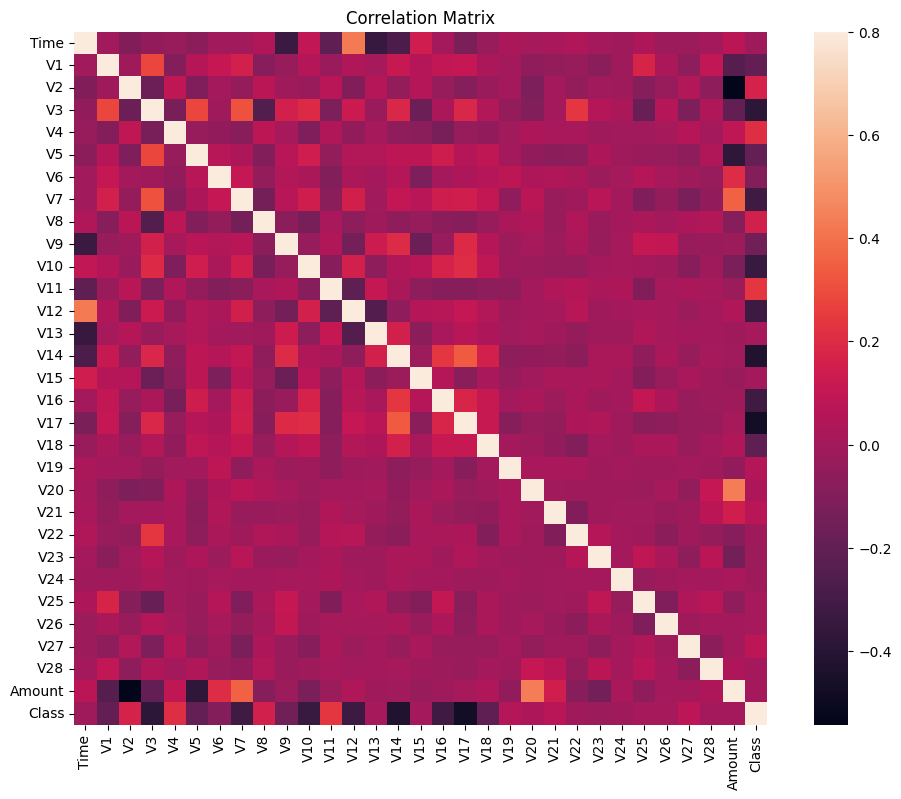

Target variable contains NaN values. Please handle them before proceeding.


In [4]:
# Project: Credit Card Fraud Detection
# Author: Rahul Raj Singh

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("/content/creditcard.csv")

# Explore the dataset
print("Shape of the dataset:", df.shape)
print("Last 10 rows of the dataset:\n", df.tail(10))
print("Information about the dataset:\n", df.info())
print("Class distribution:\n", df["Class"].value_counts())

# Separate fraud and valid transactions
fraud = df[df["Class"]==1]
valid = df[df["Class"]==0]

print("Fraud transaction cases:", len(fraud))
print("Valid transaction cases:", len(valid))

print("Amount details of fraud transactions:\n", fraud.Amount.describe())
print("Amount details of valid transactions:\n", valid.Amount.describe())

# Visualize correlation matrix
cor = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(cor, vmax=.8, square=True)
plt.title("Correlation Matrix")
plt.show()

# Divide the dataset into features (X) and target variable (Y)
X = df.drop(['Class'], axis=1)
Y = df["Class"]

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

# For non-numeric columns, you may choose to drop them or use a different strategy
# For example, dropping non-numeric columns:
# X = X.drop(columns=non_numeric_cols)

# Check for NaN values in the target variable
if Y.isnull().any():
    print("Target variable contains NaN values. Please handle them before proceeding.")
    # You may choose to drop NaN values or use a different strategy for the target variable
else:
    # Convert to numpy arrays for processing
    xData = X.values
    yData = Y.values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.3, random_state=42)

    # Create a Random Forest Classifier
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")

    # Display classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
